In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names=['Preg','Gluc','BP','SK','Insulin','BMI','DPF','Age','Outcome']
dataset=pd.read_csv(url,names=names)

In [3]:
dataset

,Preg,Gluc,BP,SK,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.head()

,Preg,Gluc,BP,SK,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.tail()

,Preg,Gluc,BP,SK,Insulin,BMI,DPF,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Preg     768 non-null    int64  
 1   Gluc     768 non-null    int64  
 2   BP       768 non-null    int64  
 3   SK       768 non-null    int64  
 4   Insulin  768 non-null    int64  
 5   BMI      768 non-null    float64
 6   DPF      768 non-null    float64
 7   Age      768 non-null    int64  
 8   Outcome  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
X=dataset.iloc[:,0:8]
y=dataset.iloc[:,8]

In [8]:
X

,Preg,Gluc,BP,SK,Insulin,BMI,DPF,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_test.shape

(154, 8)

In [33]:
rf=RandomForestClassifier(n_estimators=15, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=15, random_state=42)

In [34]:
y_pred=rf.predict(X_test)

In [14]:
y_pred.shape

(154,)

In [35]:
acc=accuracy_score(y_test,y_pred)

In [36]:
acc

0.7532467532467533

In [17]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[76, 23],
       [21, 34]], dtype=int64)

In [18]:
rep=classification_report(y_test,y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.78      0.77      0.78        99
           1       0.60      0.62      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.71      0.72       154



In [19]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

In [20]:
feature_imp=rf.feature_importances_

In [21]:
feature_imp

array([0.07420785, 0.25373331, 0.09216309, 0.06452734, 0.07597611,
       0.16791714, 0.12599428, 0.14548087])

In [22]:
indices=np.argsort(feature_imp)[::-1]

In [23]:
indices

array([1, 5, 7, 6, 2, 4, 0, 3], dtype=int64)

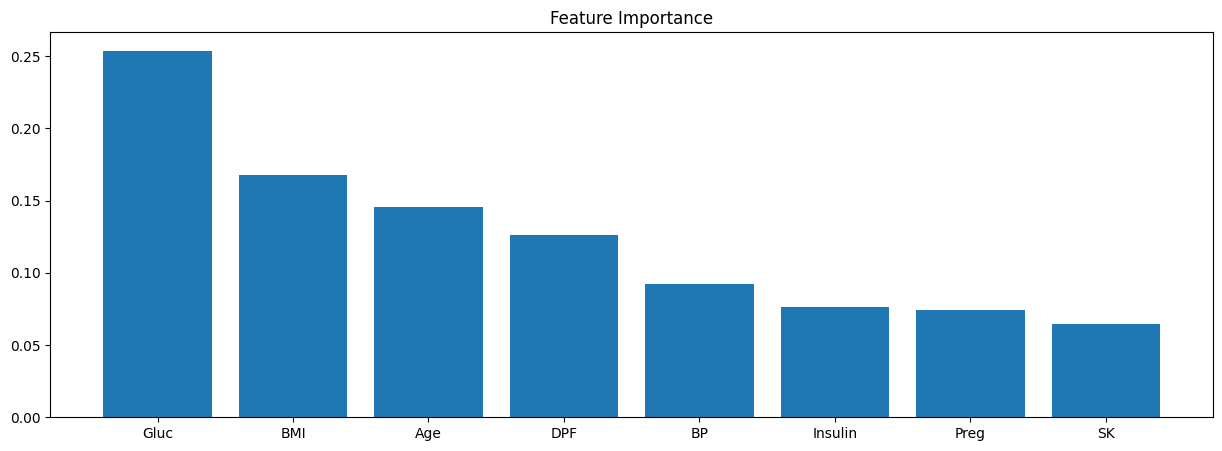

In [24]:
plt.figure(figsize=(15,5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]),feature_imp[indices],align='center')
plt.xticks(range(X_train.shape[1]),[X.columns[i] for i in indices])
plt.show()


In [25]:
from sklearn.tree import plot_tree

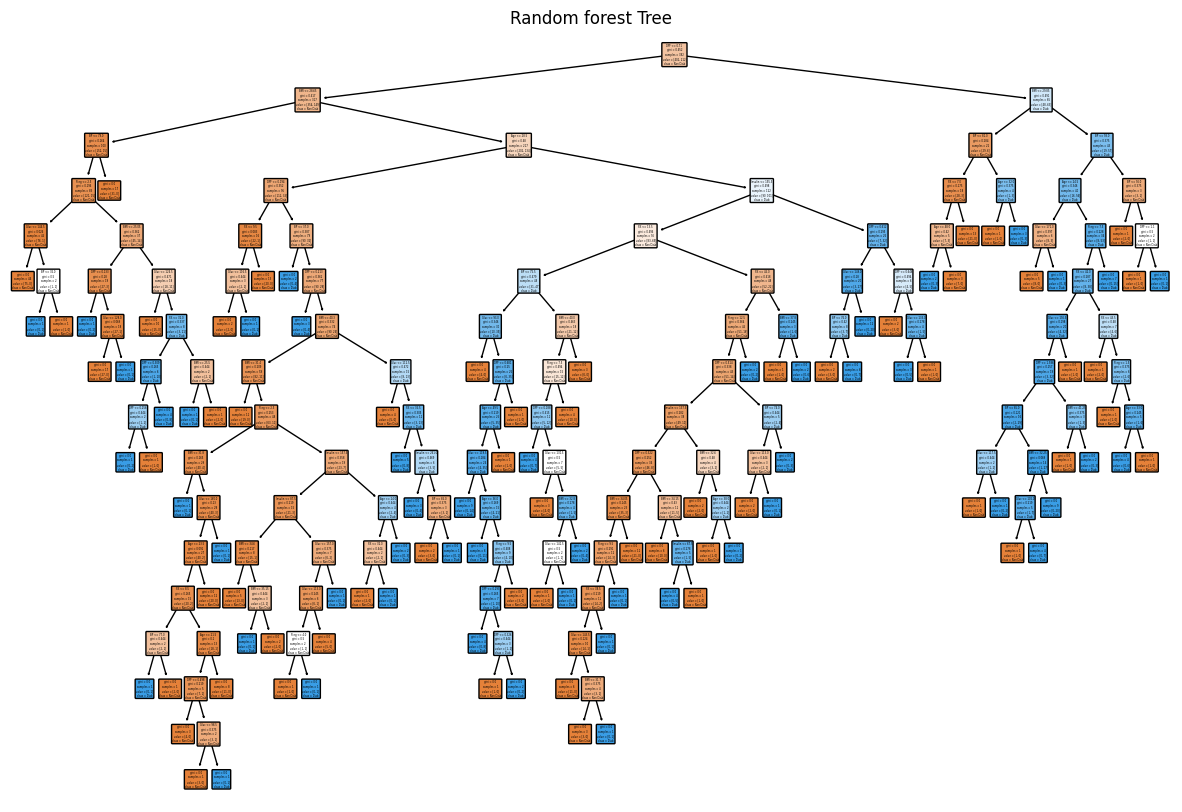

In [26]:
tree=rf.estimators_[2]
plt.figure(figsize=(15,10))
plot_tree(tree,feature_names=list(X.columns),class_names=['Non Diab','Diab'],filled=True,rounded=True)
plt.title('Random forest Tree')
plt.show()

In [27]:
from sklearn.model_selection import validation_curve

estimator_range=np.arange(1,101,5)

In [28]:
train_scores,validation_score=validation_curve(RandomForestClassifier(random_state=42),
                                               X,y,param_name='n_estimators',
                                               param_range=estimator_range,scoring='accuracy',
                                               cv=5,n_jobs=-1)

In [30]:
train_scores_mean=np.mean(train_scores,axis=1)
train_scores_std=np.std(train_scores,axis=1)


validation_score_mean=np.mean(validation_score,axis=1)
validation_score_std=np.std(validation_score,axis=1)

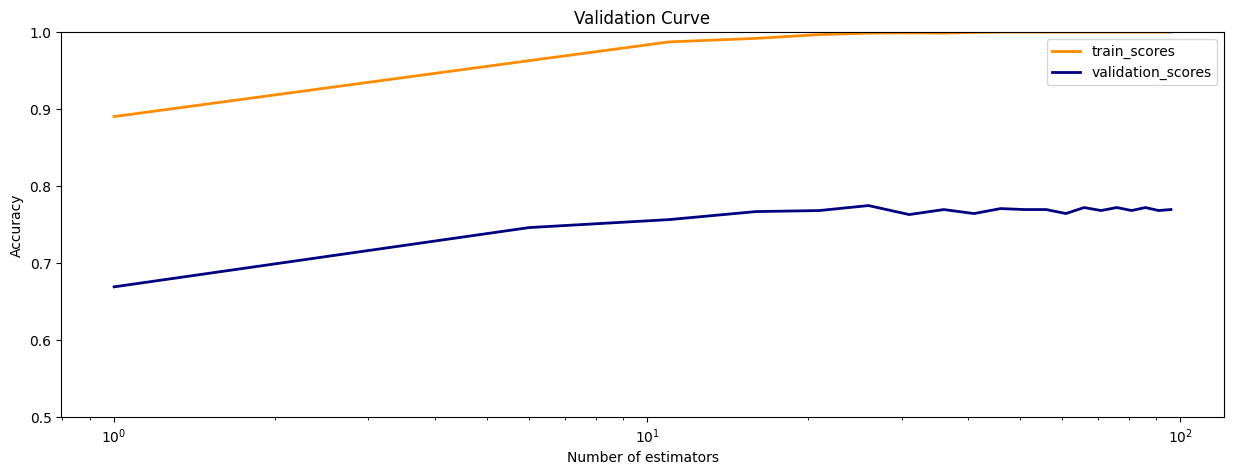

In [32]:
plt.figure(figsize=(15,5))
plt.title("Validation Curve")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.ylim(0.5,1)


plt.semilogx(estimator_range,train_scores_mean,label='train_scores',lw=2,color='darkorange')
plt.semilogx(estimator_range,validation_score_mean,label='validation_scores',lw=2,color='navy')

plt.legend()
plt.show()